In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

filepaths = [
    "Ultimate_AAPL_filtered.csv",
    "Ultimate_TSLA_filtered.csv",
    "Ultimate_MSFT_filtered.csv",
    "Ultimate_GOOG_filtered.csv",
    "Ultimate_AMZN_filtered.csv",
]

scaler = MinMaxScaler()
lin_reg = LinearRegression()

# Train the model using the first four datasets
X_train_list = []
y_train_list = []

for filepath in filepaths[:-1]:
    df = pd.read_csv(filepath)

    X = df[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
    y = df['Close_price-2days']

    X_scaled = scaler.fit_transform(X)
    X_train_list.append(X_scaled)
    y_train_list.append(y.values)

X_train = np.vstack(X_train_list)
y_train = np.concatenate(y_train_list)

lin_reg.fit(X_train, y_train)

# Test the model on the fifth dataset
df_test = pd.read_csv(filepaths[-1])

X_test = df_test[["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]]
y_test = df_test['Close_price-2days']

X_test_scaled = scaler.transform(X_test)

test_score = lin_reg.score(X_test_scaled, y_test)

print("Test score on the fifth dataset:", test_score)


Test score on the fifth dataset: 0.6344514586880255


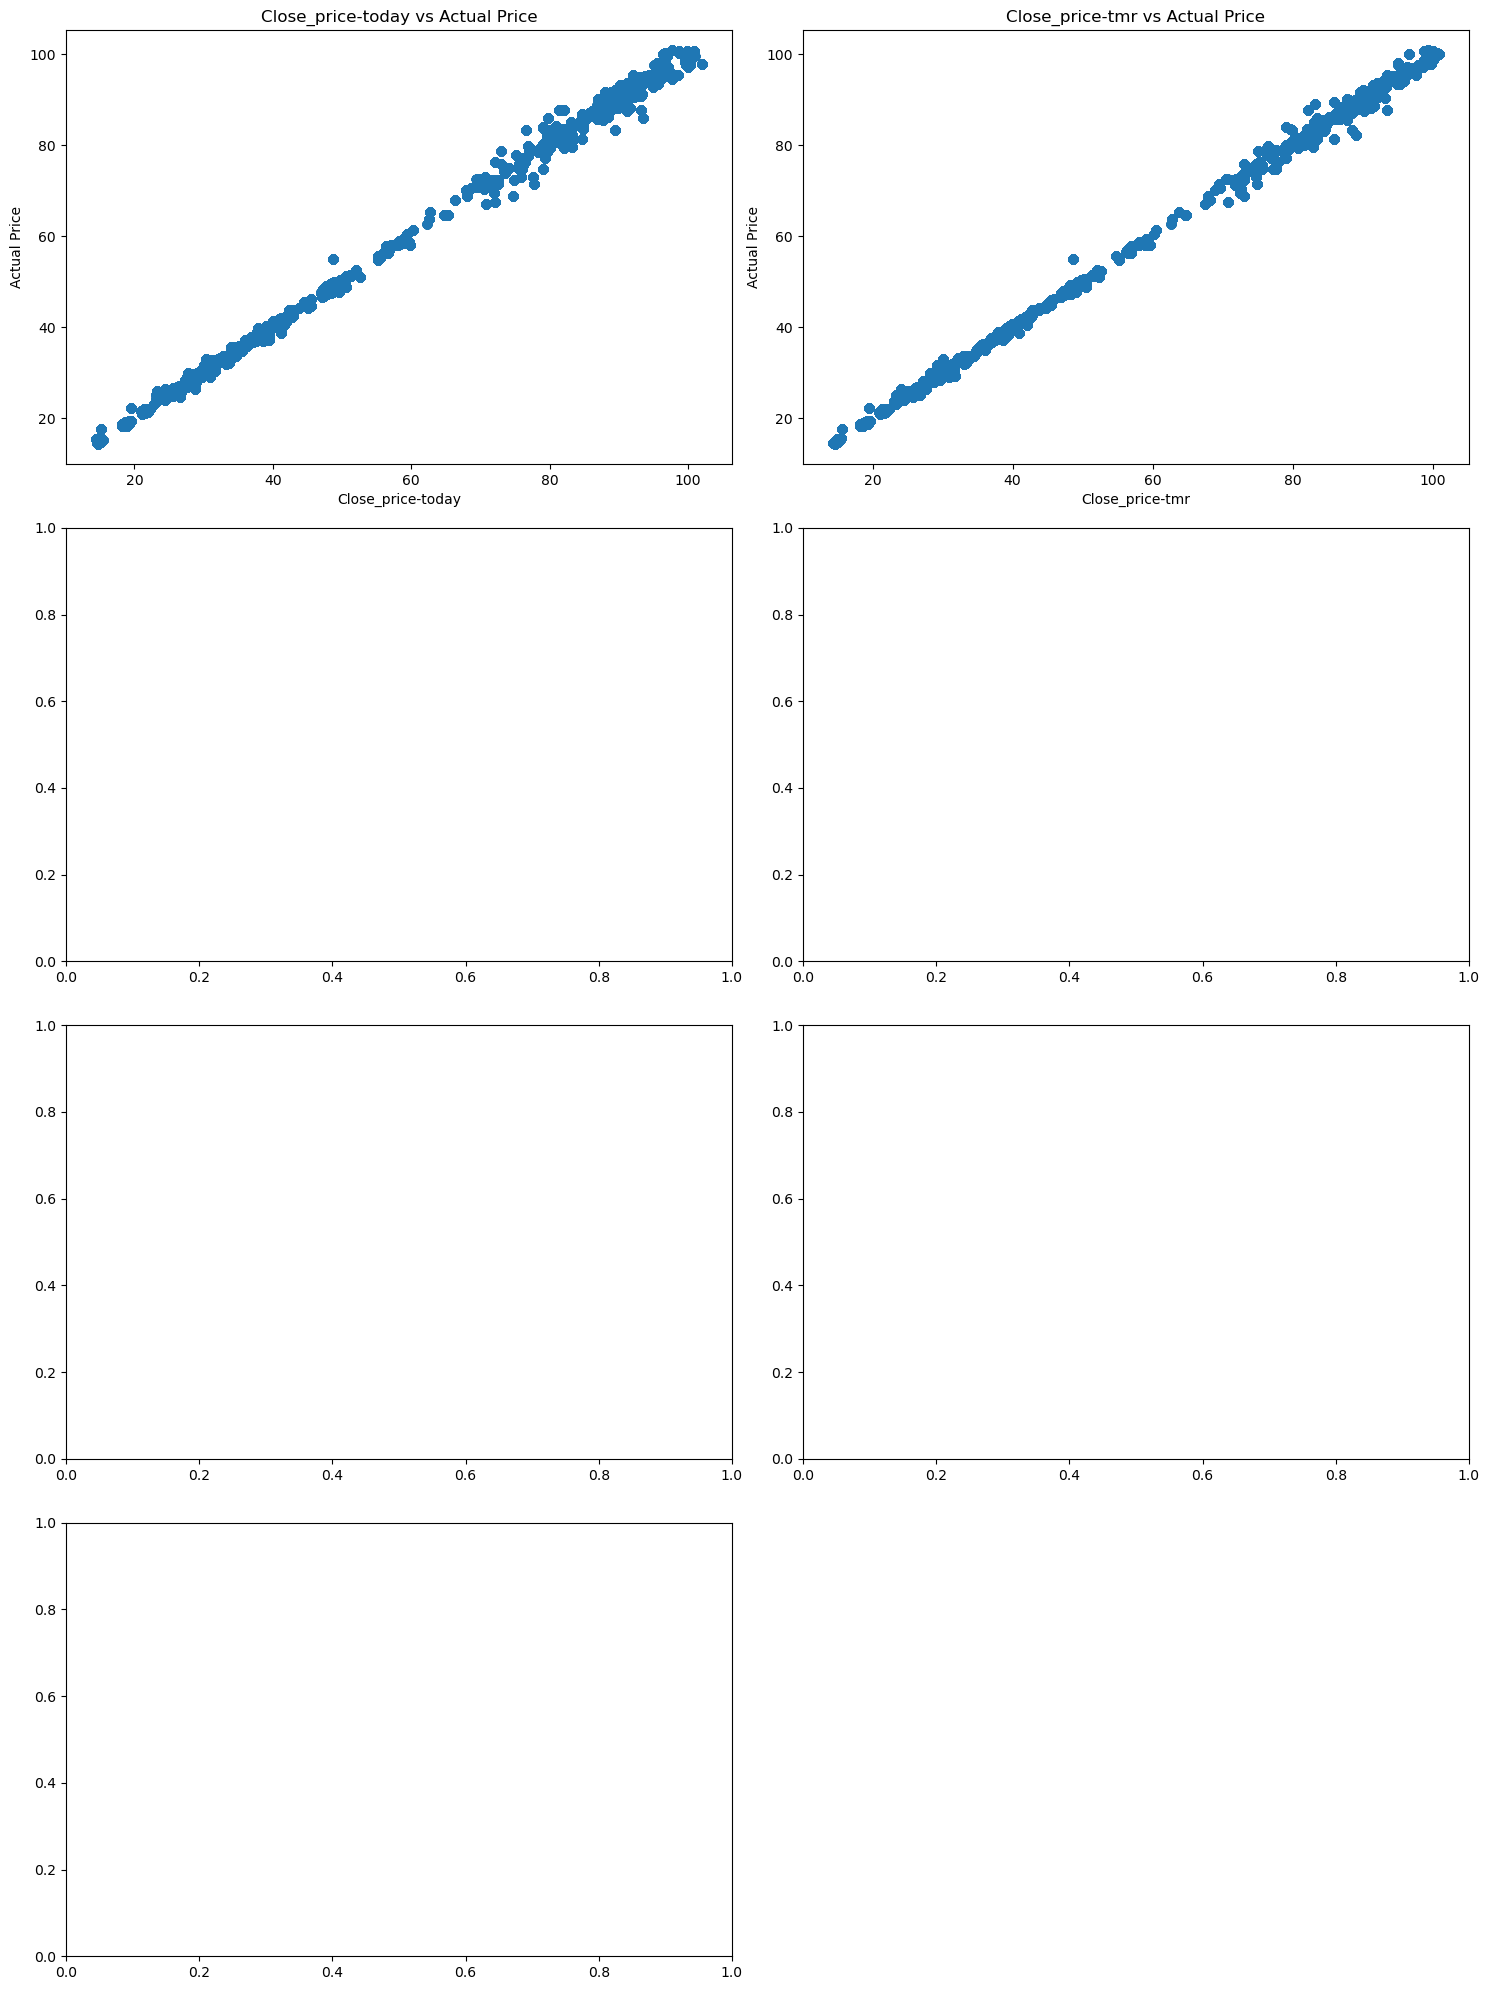

In [17]:
import matplotlib.pyplot as plt

feature_names = ["comment_num", "retweet_num", "like_num", "follower_count", "compound_score", "Close_price-today", "Close_price-tmr"]

# Create a subplot for each feature
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.flatten()

for i, feature_name in enumerate(feature_names[-2:]):
    axs[i].scatter(X_test[feature_name], y_test)
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Actual Price')
    axs[i].set_title(f'{feature_name} vs Actual Price')

    # Save the first 2 plots as PNG files
    if i < 2:
        plt.savefig(f'{feature_name}_vs_actual_price.png')

# Remove the last empty subplot
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()
